# 9. Law of the Iterated Logarithm

**Goal:** Visualize the exact fluctuation envelope of random walks.

**LIL:** For i.i.d. mean-0, variance-1 variables:
$$\limsup_{n\to\infty} \frac{S_n}{\sqrt{2n \log\log n}} = 1 \quad \text{a.s.}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

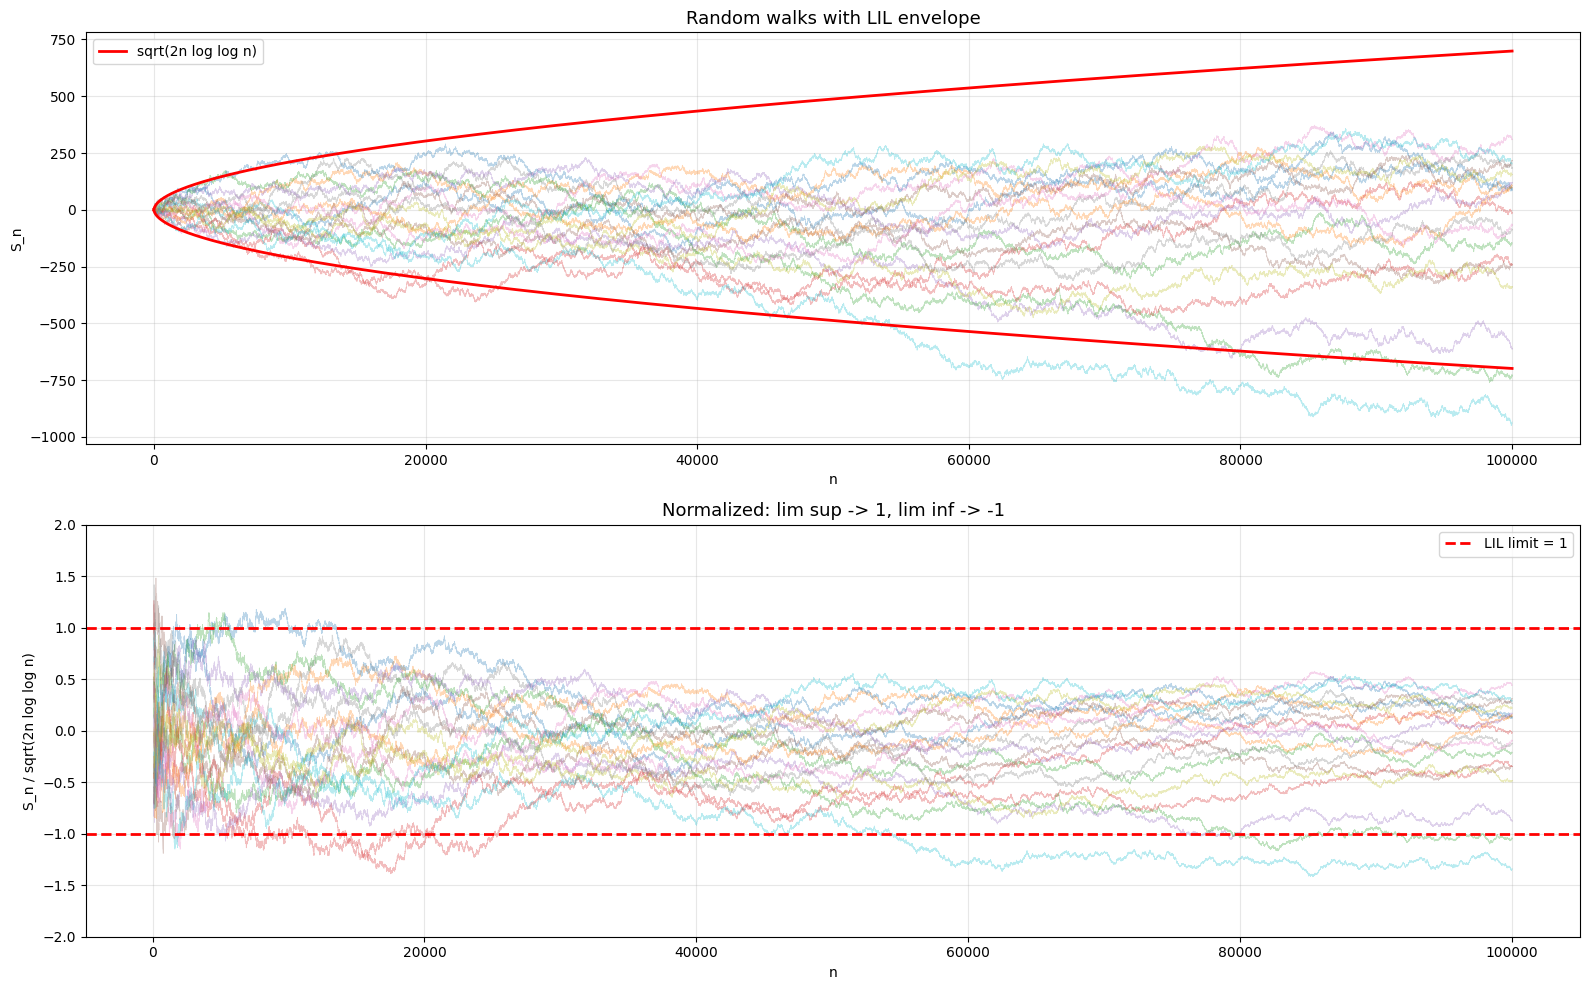

In [2]:
np.random.seed(42)
N = 100000
n_paths = 50
ns = np.arange(1, N+1)
envelope = np.sqrt(2 * ns * np.log(np.maximum(np.log(ns), 1)))

samples = np.random.normal(0, 1, (n_paths, N))
walks = np.cumsum(samples, axis=1)

fig, axes = plt.subplots(2, 1, figsize=(16, 10))
ax = axes[0]
for i in range(min(20, n_paths)):
    ax.plot(ns, walks[i], alpha=0.3, linewidth=0.5)
ax.plot(ns, envelope, 'r-', linewidth=2, label='sqrt(2n log log n)')
ax.plot(ns, -envelope, 'r-', linewidth=2)
ax.set_xlabel('n'); ax.set_ylabel('S_n')
ax.set_title('Random walks with LIL envelope', fontsize=13)
ax.legend(); ax.grid(True, alpha=0.3)

ax = axes[1]
for i in range(min(20, n_paths)):
    ratio = walks[i] / np.maximum(envelope, 1)
    ax.plot(ns[100:], ratio[100:], alpha=0.3, linewidth=0.5)
ax.axhline(1, color='red', linestyle='--', linewidth=2, label='LIL limit = 1')
ax.axhline(-1, color='red', linestyle='--', linewidth=2)
ax.set_xlabel('n'); ax.set_ylabel('S_n / sqrt(2n log log n)')
ax.set_title('Normalized: lim sup -> 1, lim inf -> -1', fontsize=13)
ax.set_ylim(-2, 2); ax.legend(); ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Running Maximum of the Ratio

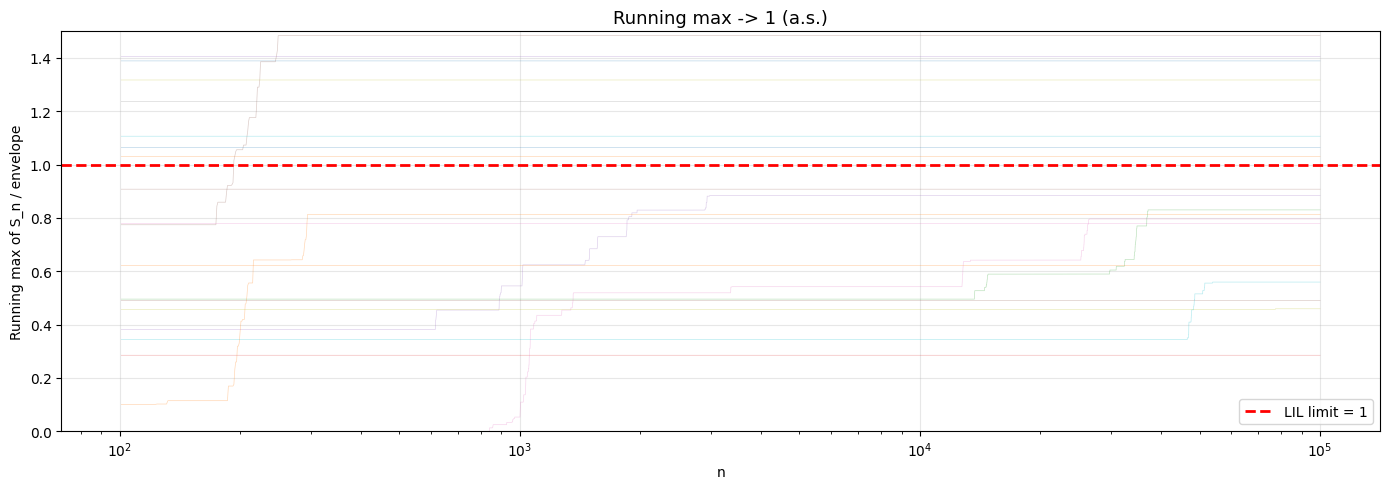

In [3]:
fig, ax = plt.subplots(figsize=(14, 5))
for i in range(min(30, n_paths)):
    ratio = walks[i] / np.maximum(envelope, 1)
    running_max = np.maximum.accumulate(ratio)
    ax.plot(ns[100:], running_max[100:], alpha=0.3, linewidth=0.5)
ax.axhline(1, color='red', linewidth=2, linestyle='--', label='LIL limit = 1')
ax.set_xlabel('n'); ax.set_ylabel('Running max of S_n / envelope')
ax.set_title('Running max -> 1 (a.s.)', fontsize=13)
ax.set_xscale('log'); ax.set_ylim(0, 1.5)
ax.legend(); ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Key Takeaways

1. **LIL** gives the exact a.s. fluctuation rate — finer than SLLN ($S_n/n \to 0$) and CLT ($S_n/\sqrt{n}$ is $O(1)$).
2. The envelope $\sqrt{2n\log\log n}$ is hit infinitely often but never permanently exceeded.
3. Demonstrates the hierarchy: SLLN < CLT < LIL in precision.